In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

df1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
df2.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
df1.shape

(8068, 11)

In [6]:
df1.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [7]:
df1.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [8]:
df1.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [9]:
df1.duplicated().sum()

0

In [10]:
df2.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [11]:
df1_num = df1.select_dtypes(include=['float64','int64']).columns
df2_num = df2.select_dtypes(include=['float64','int64']).columns
print(df1_num)

Index(['ID', 'Age', 'Work_Experience', 'Family_Size'], dtype='object')


In [12]:
df1[df1_num] = df1[df1_num].fillna(df1[df1_num].median())
df1.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1               76
Segmentation         0
dtype: int64

In [13]:
df2[df2_num] = df2[df2_num].fillna(df2[df2_num].median())
df2.isnull().sum()

ID                  0
Gender              0
Ever_Married       50
Age                 0
Graduated          24
Profession         38
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              32
dtype: int64

In [14]:
categorical_cols_train = df1.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols_test = df2.select_dtypes(include=['object', 'category']).columns.tolist()

In [15]:
for col in categorical_cols_train:
    mode_value = df1[col].mode()[0]
    df1[col] = df1[col].fillna(mode_value)

for col in categorical_cols_test:
    mode_value = df2[col].mode()[0]
    df2[col] = df2[col].fillna(mode_value)

print("Remaining missing values in categorical columns (train):")
print(df1[categorical_cols_train].isnull().sum())

print("\nRemaining missing values in categorical columns (test):")
print(df2[categorical_cols_test].isnull().sum())

Remaining missing values in categorical columns (train):
Gender            0
Ever_Married      0
Graduated         0
Profession        0
Spending_Score    0
Var_1             0
Segmentation      0
dtype: int64

Remaining missing values in categorical columns (test):
Gender            0
Ever_Married      0
Graduated         0
Profession        0
Spending_Score    0
Var_1             0
dtype: int64


In [16]:
from sklearn.preprocessing import StandardScaler
df1 = df1.copy()
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df1[numeric_cols] = scaler.fit_transform(df1[numeric_cols])
print(df1[numeric_cols].describe().round(2))

            ID      Age  Work_Experience  Family_Size
count  8068.00  8068.00          8068.00      8068.00
mean     -0.00     0.00            -0.00        -0.00
std       1.00     1.00             1.00         1.00
min      -1.73    -1.52            -0.76        -1.24
25%      -0.86    -0.81            -0.76        -0.57
50%      -0.00    -0.21            -0.45         0.10
75%       0.87     0.57             0.47         0.76
max       1.73     2.72             3.53         4.10


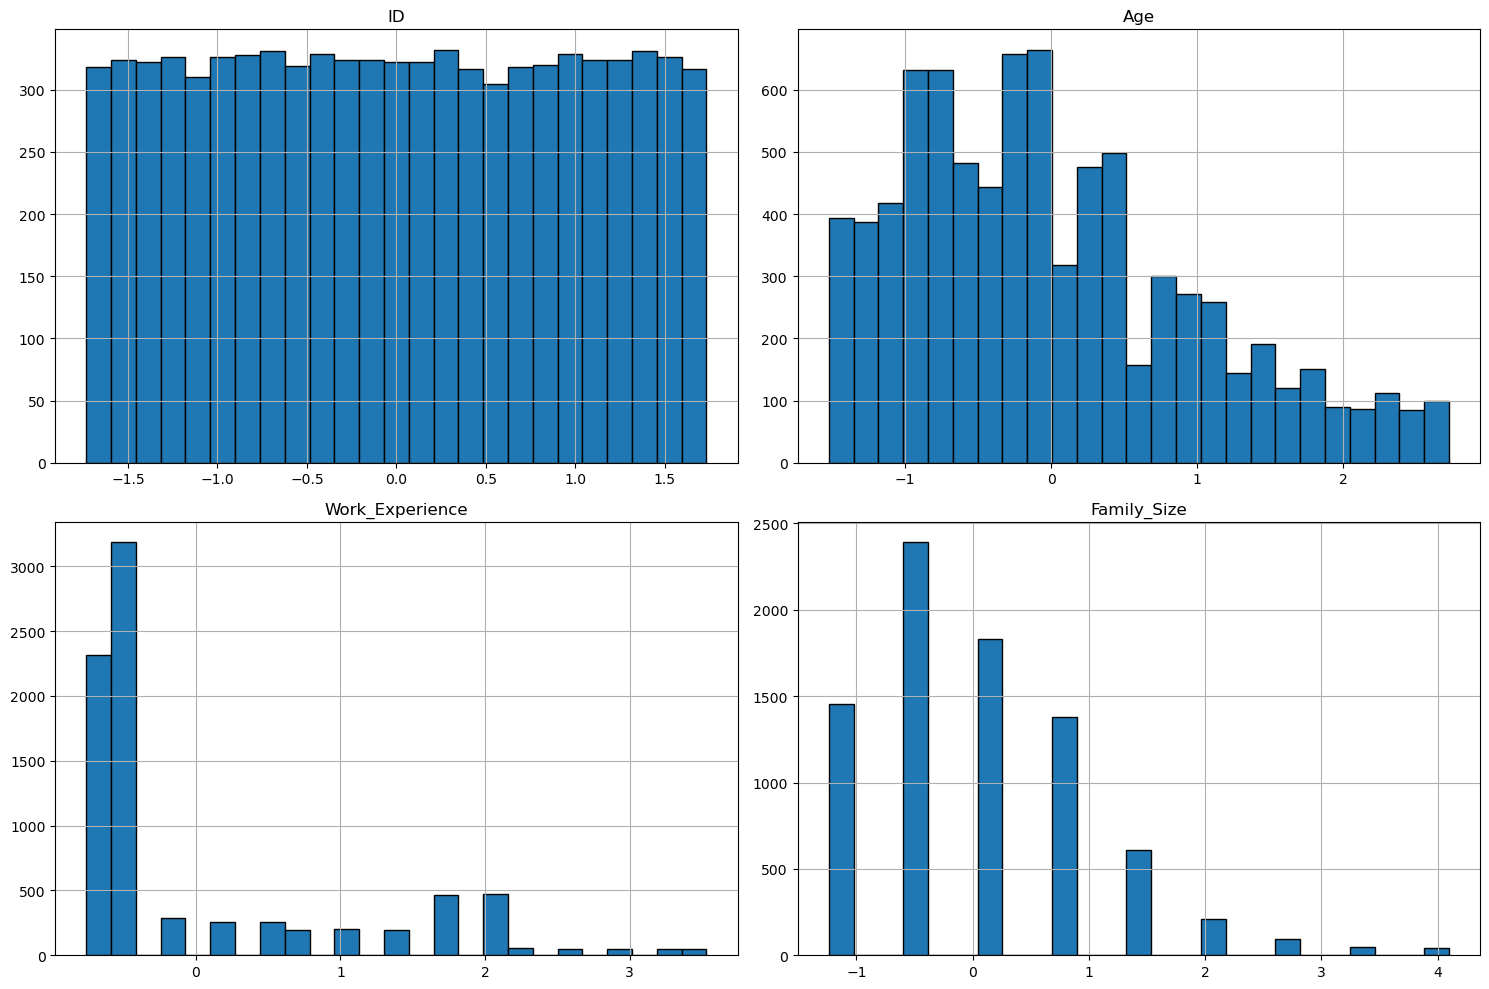

In [17]:
df1[numeric_cols].hist(bins = 25,figsize=(15,10),edgecolor = 'black')
plt.tight_layout()
plt.show()

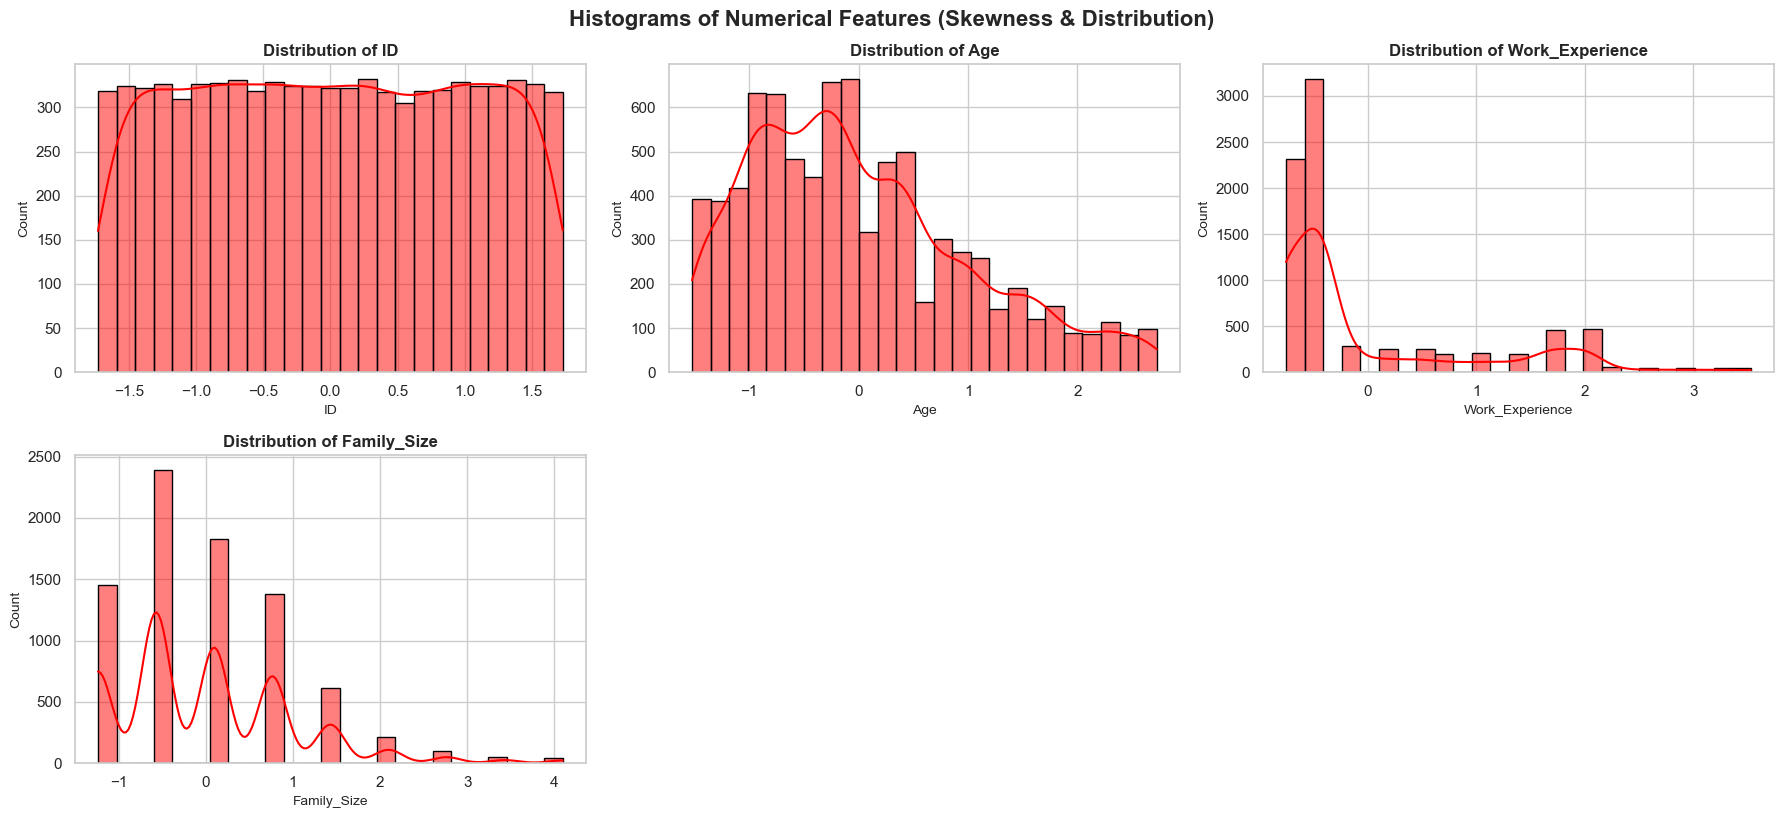

In [18]:
sns.set(style="whitegrid")

num_cols = len(numeric_cols)
n_cols = 3
n_rows = (num_cols + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df1[col], kde=True, color='red', edgecolor='black', bins=25)
    plt.title(f'Distribution of {col}', fontsize=12, weight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.grid(True)
    
plt.tight_layout()
plt.suptitle("Histograms of Numerical Features (Skewness & Distribution)", fontsize=16, weight='bold', y=1.02)
plt.show()

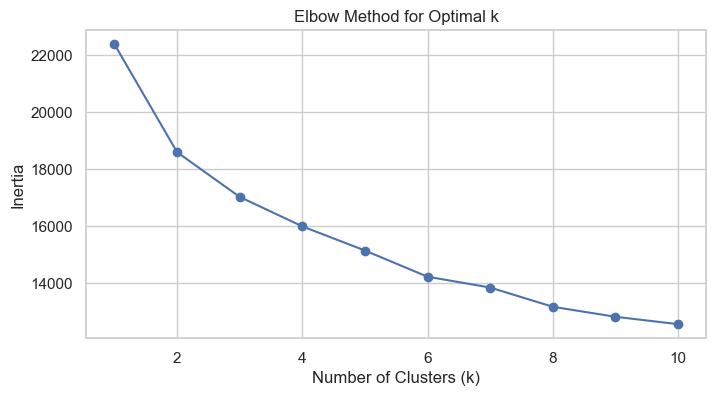

In [19]:
df1 = df1.select_dtypes(include=['object'])
df1_encoded = pd.get_dummies(df1, drop_first=True)
from sklearn.cluster import KMeans
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1_encoded)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

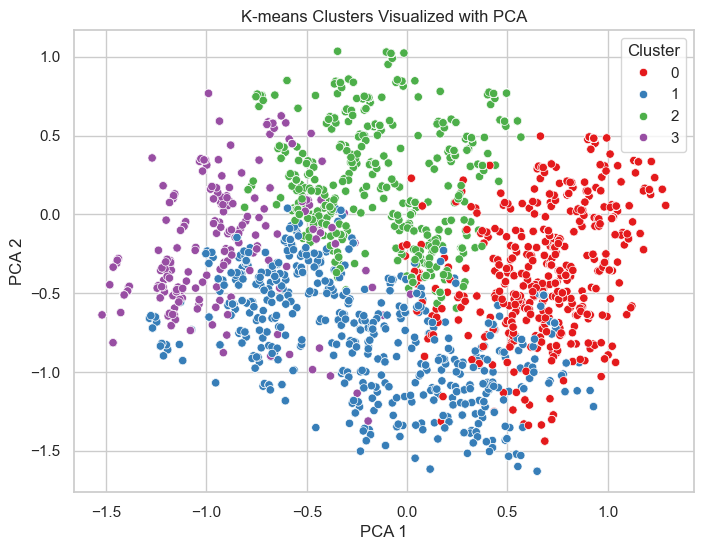

In [22]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)
train_pca = pca.fit_transform(df1_encoded)

# Apply KMeans for visualization (e.g., k=4 based on Elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df1_encoded)

# Plot PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=cluster_labels, palette='Set1')
plt.title('K-means Clusters Visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [26]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for KMeans
sil_score_kmeans = silhouette_score(df1_encoded, cluster_labels)
sil_score_kmeans


0.14274584711428193

In [28]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering (e.g., n_clusters=4)
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_cluster.fit_predict(df1_encoded)

# Calculate silhouette score for Agglomerative clustering
sil_score_agg = silhouette_score(df1_encoded, agg_labels)

sil_score_kmeans, sil_score_agg


(0.14274584711428193, 0.07932975387195403)